In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file1 = "clinicaltrial_data.csv"
file2 = "mouse_drug_data.csv"

clinical_trial_data = pd.read_csv(file1)
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
mouse_drug_data = pd.read_csv(file2)
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [9]:
a = mouse_drug_data['Drug'].value_counts()
a

Propriva     25
Capomulin    25
Infubinol    25
Ceftamin     25
Ramicane     25
Naftisol     25
Ketapril     25
Stelasyn     25
Placebo      25
Zoniferol    25
Name: Drug, dtype: int64

In [108]:
clinical_trial_data.loc[clinical_trial_data['Mouse ID']=='c819']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
4,c819,0,45.000000,0
461,c819,5,45.769249,1
546,c819,10,46.658395,1
722,c819,15,48.370999,1
1033,c819,20,49.762415,1
1258,c819,25,51.828357,1
1434,c819,30,56.098998,1
1609,c819,35,57.729535,1
1707,c819,40,62.175705,1


In [112]:
merged_data = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID")
print(merged_data.head())

filtered_4_drugs = merged_data[(merged_data['Drug'] == 'Capomulin') |
                               (merged_data['Drug']== 'Infubinol') | 
                               (merged_data['Drug']== 'Ketapril') | 
                               (merged_data['Drug']== 'Placebo')]

merged_data.describe()


  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0     b128          0           45.000000                 0  Capomulin
1     b128          5           45.651331                 0  Capomulin
2     b128         10           43.270852                 0  Capomulin
3     b128         15           43.784893                 0  Capomulin
4     b128         20           42.731552                 0  Capomulin


,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


[100  97  92  84  81  76  72  65  58  52]
[ 0  5 10 15 20 25 30 35 40 45]


Text(0.5,0,'Treatment Number')

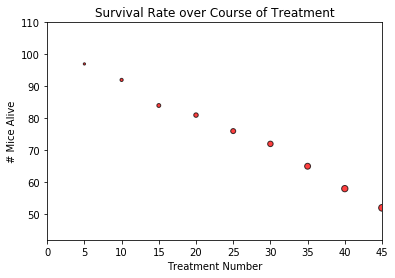

In [109]:
x_limit = 45
x_axis = np.arange(0, x_limit + 5, 5)

# Count of each Timepoint value indicates the number of mice that had a treatment at that timepoint.
# If they didn't have a treatment, they died prior to that treatment.
num_alive = filtered_4_drugs.Timepoint.value_counts().values

print(num_alive)
print(x_axis)
plt.scatter(x_axis, num_alive, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)

minimum_y_value = filtered_4_drugs.Timepoint.value_counts().min() 
maximum_y_value = filtered_4_drugs.Timepoint.value_counts().max() 

#Add 10 to add room at top and bottom, so y value is not on x_axis.
plt.ylim(minimum_y_value - 10, maximum_y_value + 10)
plt.xlim(0, x_limit)

plt.title("Survival Rate over Course of Treatment")
plt.ylabel("# Mice Alive")
plt.xlabel("Treatment Number")

0       45.000000
1       45.651331
2       43.270852
3       43.784893
4       42.731552
5       43.262145
6       40.605335
7       37.967644
8       38.379726
9       38.982878
10      45.000000
11      45.000000
12      48.791665
13      53.435987
14      58.135545
15      62.706031
16      64.663626
17      69.160520
18      71.905117
19      45.000000
20      47.462891
21      49.783419
22      45.000000
23      45.769249
24      46.658395
25      48.370999
26      49.762415
27      51.828357
28      56.098998
29      57.729535
          ...    
1876    44.596219
1877    45.261384
1878    45.941949
1879    46.821070
1880    47.685963
1881    45.000000
1882    45.622381
1883    46.414518
1884    39.804453
1885    38.909349
1886    37.695432
1887    38.212479
1888    32.562839
1889    32.947615
1890    33.329098
1891    45.000000
1892    38.796474
1893    35.624403
1894    32.623003
1895    30.485985
1896    45.000000
1897    41.408591
1898    36.825367
1899    35.464612
1900    34

ValueError: x and y must be the same size

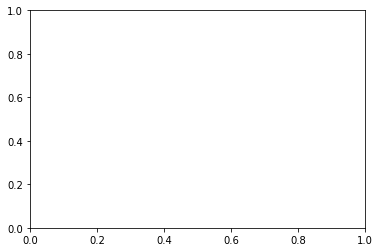

In [115]:
tumor_volume = filtered_4_drugs['Tumor Volume (mm3)']

print(tumor_volume)
print(x_axis)
plt.scatter(x_axis, tumor_volume, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)

minimum_y_value = filtered_4_drugs['Tumor Volume (mm3)'].value_counts().min() 
maximum_y_value = filtered_4_drugs['Tumor Volume (mm3)'].value_counts().max() 

#Add 10 to add room at top and bottom, so y value is not on x_axis.
plt.ylim(minimum_y_value - 10, maximum_y_value + 10)
plt.xlim(0, x_limit)

plt.title("Tumor Volume Change over Course of Treatment")
plt.ylabel("Tumor Volume")
plt.xlabel("Treatment Number")